In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")
stores = pd.read_excel(r"C:\Users\Acer-\Downloads\Store Sales Project\Stores.xlsx")
stores

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [3]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [4]:
stores.describe()

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [5]:
stores.set_index('Store_ID')

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_ID,,,,
1,1659,1961,530,66490
2,1461,1752,210,39820
3,1340,1609,720,54010
4,1451,1748,620,53730
5,1770,2111,450,46620
...,...,...,...,...
892,1582,1910,1080,66390
893,1387,1663,850,82080
894,1200,1436,1060,76440


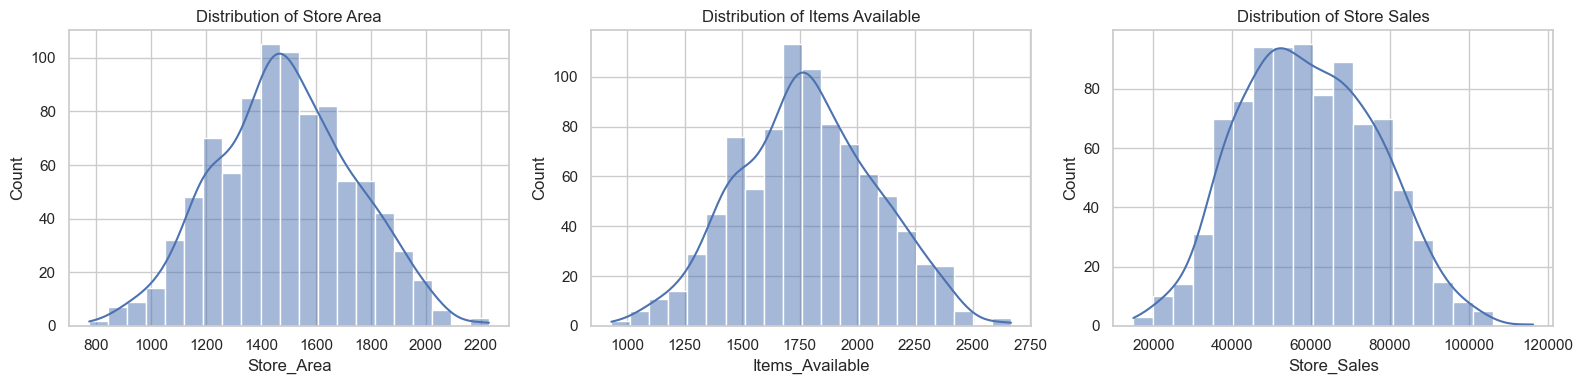

In [6]:
# Plot distributions
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.histplot(stores['Store_Area'], kde=True)
plt.title('Distribution of Store Area')

plt.subplot(1, 3, 2)
sns.histplot(stores['Items_Available'], kde=True)
plt.title('Distribution of Items Available')

plt.subplot(1, 3, 3)
sns.histplot(stores['Store_Sales'], kde=True)
plt.title('Distribution of Store Sales')

plt.tight_layout()
plt.show()

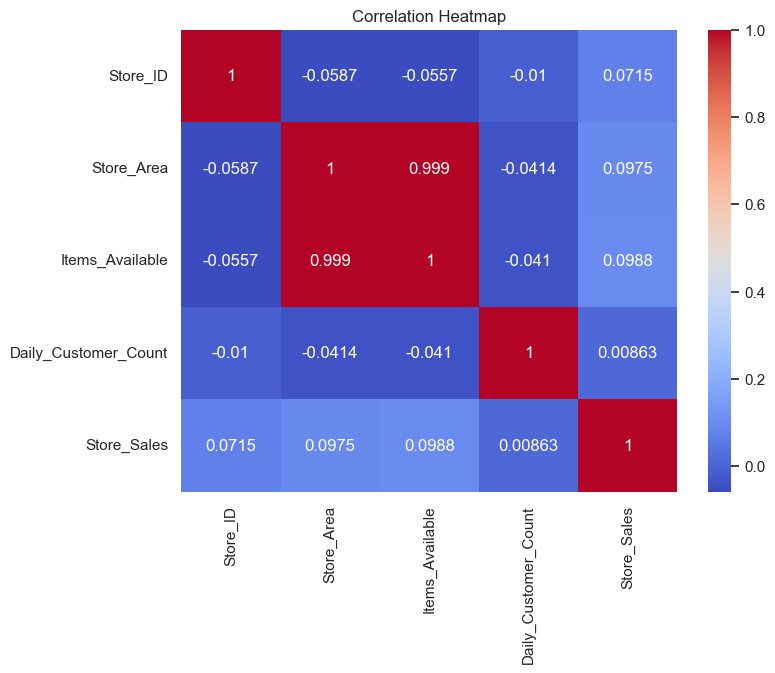

In [7]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(stores.corr(), annot=True,fmt='.3g', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
#Top 5 stores with highest sales per square foot
stores['Sales_per_sqyd'] = stores['Store_Sales'] / stores['Store_Area']
top5_sales_per_sqyd = stores.sort_values(by='Sales_per_sqyd', ascending=False).head(5)
print("Top 5 Stores by Sales per Square Yard:")
print(top5_sales_per_sqyd[['Store_ID', 'Store_Sales', 'Store_Area', 'Sales_per_sqyd']])

Top 5 Stores by Sales per Square Yard:
     Store_ID  Store_Sales  Store_Area  Sales_per_sqyd
556       557        89760         932       96.309013
468       469        97360        1060       91.849057
744       745        77740         854       91.030445
557       558       101780        1137       89.516271
339       340        85470         966       88.478261


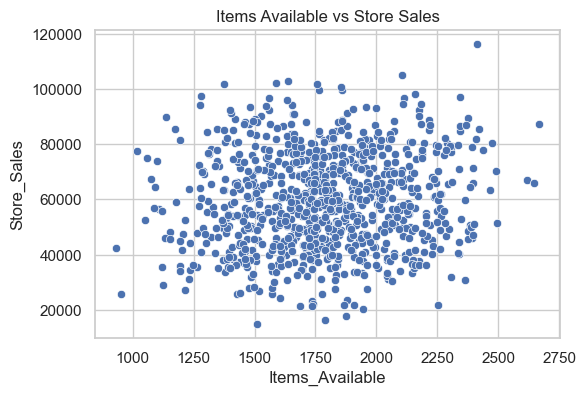

In [10]:
#Relationship: Items Available vs Store Sales
plt.figure(figsize=(6, 4))
sns.scatterplot(data=stores, x='Items_Available', y='Store_Sales')
plt.title('Items Available vs Store Sales')
plt.show()

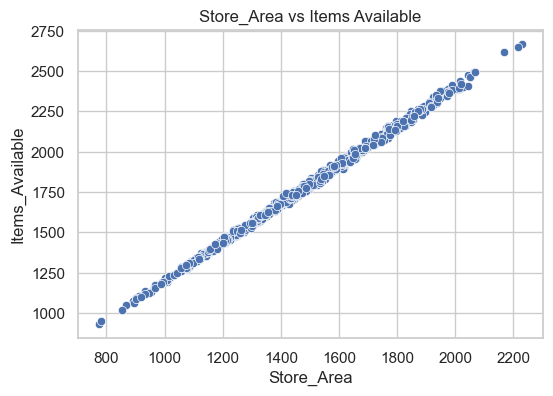

In [11]:
#Relationship: Items Available vs Store Sales
plt.figure(figsize=(6, 4))
sns.scatterplot(data=stores, x='Store_Area', y='Items_Available')
plt.title('Store_Area vs Items Available')
plt.show()

In [12]:
#Create new column Sales_per_Customer
stores['Sales_per_Customer'] = stores['Store_Sales'] / stores['Daily_Customer_Count']

#Find the store with highest Sales per Customer
top_sales_per_customer = stores.sort_values(by='Sales_per_Customer', ascending=False).head(10)
print("Store with Highest Sales per Customer:")
print(top_sales_per_customer[['Store_ID', 'Store_Sales', 'Daily_Customer_Count', 'Sales_per_Customer']])

Store with Highest Sales per Customer:
     Store_ID  Store_Sales  Daily_Customer_Count  Sales_per_Customer
39         40        45480                    10         4548.000000
151       152        63730                    70          910.428571
876       877        88270                   100          882.700000
887       888        92370                   140          659.785714
230       231        72350                   120          602.916667
146       147        58920                   130          453.230769
687       688        72740                   230          316.260870
300       301        68850                   220          312.954545
538       539        64780                   210          308.476190
710       711        55980                   190          294.631579
